## Problem:
Suppose we visit a wild animal preserve where we know that the only animals are lions and tigers and bears, but we don't know how many of each there are. 
During the tour, we see 3 lions, 2 tigers, and 1 bear. Assuming that every animal had an equal chance to appear in our sample, estimate the prevalence of each species.
What is the probability that the next animal we see is a bear?

In [43]:
import pymc3 as pm
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 22
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [33]:
species = ['lions', 'tigers', 'bears']
observations = np.array([3,2,1])
priorObs = np.array([1,1,1])

expectedProb = (observations + priorObs)/(np.sum(observations) + np.sum(priorObs))
print( dict( zip(species, expectedProb) ) )

{'lions': 0.4444444444444444, 'tigers': 0.3333333333333333, 'bears': 0.2222222222222222}


In [34]:
# Create multinomial model
with pm.Model() as model:
    # Parameters of the Multinomial are from a prior Dirichlet
    parameters = pm.Dirichlet('parameters', a=priorObs, shape=3)
    # Observed data is from a Multinomial distribution
    observed_data = pm.Multinomial(
        'observed_data', n=6, p=parameters, shape=3, observed=observations)  

In [42]:
model

In [41]:
# Sample from model
with model:
    # Sample from the posterior
    trace = pm.sample(draws=1000, chains=2, tune=500, 
                      discard_tuned_samples=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [parameters]
/Users/fernandomontes/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/fernandomontes/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 11 seconds.


In [48]:
summary = pm.summary(trace)
summary.index = species
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lions,0.441,0.158,0.154,0.718,0.004,0.003,1442.0,1078.0,1.0
tigers,0.337,0.149,0.080,0.606,0.004,0.003,1385.0,1009.0,1.0
bears,0.222,0.129,0.011,0.451,0.003,0.002,1572.0,1282.0,1.0


/var/folders/bc/jnjf78450nz1xj6trk4p5b1c0000gr/T/ipykernel_71862/4255668653.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
/Users/fernandomontes/opt/anaconda3/lib/python3.9/site-packages/arviz/utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([[<Axes: title={'center': 'parameters'}>,
        <Axes: title={'center': 'parameters'}>]], dtype=object)

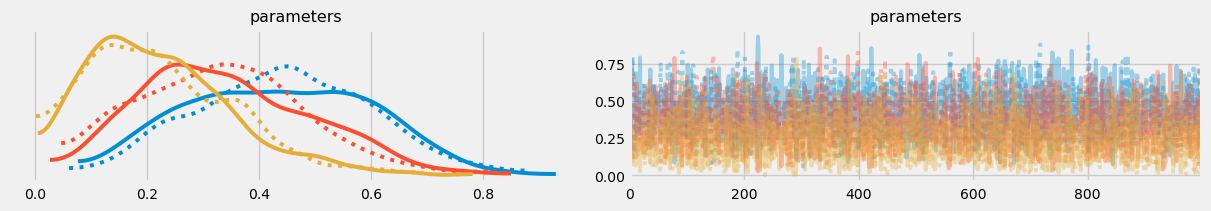

In [49]:
pm.traceplot(trace)